General imports

In [22]:
# Used imports -- standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cbsodata

# miscelaneous imports
import gc


Read csv files

In [23]:
# Read healthylife data
df_healthylife = pd.read_csv('healthylife_prep.csv', sep=',')

# Keep only the year in the datum for later merging
df_healthylife['Datum'] = df_healthylife['Datum'].str[:4].astype(int)

# Replace values since some of the cbs only has data till 2021
df_healthylife["Datum"] = df_healthylife["Datum"].replace(2022, 2021)
df_healthylife["Datum"] = df_healthylife["Datum"].replace(2023, 2021)

# Display the DataFrame
df_healthylife


,Datum,wekelijks_verschil_Lengte,wekelijks_verschil_Gewicht,wekelijks_verschil_6 MWT,wekelijks_verschil_TUG,wekelijks_verschil_BMI,wekelijks_verschil_Conditie,wekelijks_verschil_Lenigheid,wekelijks_verschil_Knijpkracht,Geslacht,age,Gemeente
0,2018,0.000000,-0.201250,-4.550000,0.257250,-0.079281,-0.010955,-2.756250,2.695000,V,51,Sittard-Geleen
1,2019,-0.116279,-0.072093,-0.930233,-0.007442,0.015440,-0.000635,0.052326,-0.116279,V,45,Sittard-Geleen
2,2018,0.000000,-0.336000,-4.853333,-0.113400,-0.146213,-0.017943,-0.186667,0.536667,V,68,Sittard-Geleen
3,2018,0.067961,-0.333010,4.281553,-0.130485,-0.145690,0.005486,0.509709,0.183495,M,64,Sittard-Geleen
4,2018,0.000000,-0.096809,1.712766,-0.154149,-0.038825,0.001529,0.316489,-0.126596,V,63,Sittard-Geleen
...,...,...,...,...,...,...,...,...,...,...,...,...
1027,2021,0.000000,0.008537,7.512195,0.128049,0.003794,0.016778,0.170732,-0.213415,V,67,Sittard-Geleen
1028,2021,0.000000,0.367073,0.256098,0.076829,0.154779,0.002522,-0.298780,0.017073,V,49,Sittard-Geleen
1029,2021,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,M,54,Roermond
1030,2021,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.200000,M,44,Roermond


In [24]:
# Read cbs data
df_cbs = pd.read_csv('cbsdata_prep.csv', sep=',')

# Display the DataFrame
df_cbs

,Gemeente,AantalInwoners_5,Mannen_6,Vrouwen_7,k_0Tot15Jaar_8,k_15Tot25Jaar_9,k_25Tot45Jaar_10,k_45Tot65Jaar_11,k_65JaarOfOuder_12,Ongehuwd_13,...,ErnstigOvergewichtObesitas_11,VoldoetAanBeweegrichtlijn_12,WekelijksSporter_13,Mantelzorger_14,ZwaarBelasteMantelzorgers_15,UrenMantelzorgPerWeek_16,Rokers_17,VoldoetAanRichtlijnAlcoholgebruik_18,ZwareDrinker_19,OvermatigDrinker_20
0,Aa en Hunze,25286,12603,12683,3572,2558,4383,8467,6306,9951,...,14.9,47.3,48.3,16.1,17.1,9.3,14.3,40.6,7.1,5.4
1,Aa en Hunze,25286,12603,12683,3572,2558,4383,8467,6306,9951,...,14.9,47.3,48.3,16.1,17.1,9.3,14.3,40.6,7.1,5.4
2,Aa en Hunze,25286,12603,12683,3572,2558,4383,8467,6306,9951,...,14.9,47.3,48.3,16.1,17.1,9.3,14.3,40.6,7.1,5.4
3,Aa en Hunze,25286,12603,12683,3572,2558,4383,8467,6306,9951,...,14.9,47.3,48.3,16.1,17.1,9.3,14.3,40.6,7.1,5.4
4,Aa en Hunze,25286,12603,12683,3572,2558,4383,8467,6306,9951,...,14.9,47.3,48.3,16.1,17.1,9.3,14.3,40.6,7.1,5.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5467,Zwolle,125548,61727,63821,22964,15916,35936,31950,18782,65865,...,11.0,54.6,54.4,13.1,12.2,11.3,17.6,38.4,7.5,5.7
5468,Zwolle,125548,61727,63821,22964,15916,35936,31950,18782,65865,...,11.0,54.6,54.4,13.1,12.2,11.3,17.6,38.4,7.5,5.7
5469,Zwolle,125548,61727,63821,22964,15916,35936,31950,18782,65865,...,11.0,54.6,54.4,13.1,12.2,11.3,17.6,38.4,7.5,5.7
5470,Zwolle,125548,61727,63821,22964,15916,35936,31950,18782,65865,...,11.0,54.6,54.4,13.1,12.2,11.3,17.6,38.4,7.5,5.7


Merging dataframes

In [27]:
# Merge the df's on the columns gemeente and datum
df_healthylife_cbs = pd.merge(df_healthylife, df_cbs, left_on=['Gemeente', 'Datum'], right_on=['Gemeente', 'Perioden'], how='inner')

# Drop columns
df_healthylife_cbs.drop(columns=['Gemeente', 'Datum', 'Perioden'], inplace=True)

In [28]:
df_healthylife_cbs

,wekelijks_verschil_Lengte,wekelijks_verschil_Gewicht,wekelijks_verschil_6 MWT,wekelijks_verschil_TUG,wekelijks_verschil_BMI,wekelijks_verschil_Conditie,wekelijks_verschil_Lenigheid,wekelijks_verschil_Knijpkracht,Geslacht,age,...,ErnstigOvergewichtObesitas_11,VoldoetAanBeweegrichtlijn_12,WekelijksSporter_13,Mantelzorger_14,ZwaarBelasteMantelzorgers_15,UrenMantelzorgPerWeek_16,Rokers_17,VoldoetAanRichtlijnAlcoholgebruik_18,ZwareDrinker_19,OvermatigDrinker_20
0,0.000000,-0.201250,-4.550000,0.257250,-0.079281,-0.010955,-2.756250,2.695000,V,51,...,17.7,45.9,46.0,16.7,12.6,10.4,18.3,47.3,6.5,5.3
1,0.000000,-0.336000,-4.853333,-0.113400,-0.146213,-0.017943,-0.186667,0.536667,V,68,...,17.7,45.9,46.0,16.7,12.6,10.4,18.3,47.3,6.5,5.3
2,0.067961,-0.333010,4.281553,-0.130485,-0.145690,0.005486,0.509709,0.183495,M,64,...,17.7,45.9,46.0,16.7,12.6,10.4,18.3,47.3,6.5,5.3
3,0.000000,-0.096809,1.712766,-0.154149,-0.038825,0.001529,0.316489,-0.126596,V,63,...,17.7,45.9,46.0,16.7,12.6,10.4,18.3,47.3,6.5,5.3
4,0.000000,0.125000,7.875000,0.043125,0.050000,0.013829,-0.156250,0.343750,V,63,...,17.7,45.9,46.0,16.7,12.6,10.4,18.3,47.3,6.5,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061,0.000000,-0.304950,-0.069307,-0.069307,-0.106143,-0.000871,0.190594,0.561386,V,55,...,22.9,36.2,35.6,15.5,19.7,14.4,24.0,49.7,5.9,4.8
1062,0.000000,-0.164286,1.571429,0.000000,-0.053644,0.002331,0.035714,0.300000,M,68,...,22.9,36.2,35.6,15.5,19.7,14.4,24.0,49.7,5.9,4.8
1063,0.000000,-0.138462,3.846154,0.000000,-0.049058,0.005878,-0.903846,0.115385,V,47,...,22.9,36.2,35.6,15.5,19.7,14.4,24.0,49.7,5.9,4.8
1064,0.038462,-0.100000,0.923077,0.000000,-0.043211,0.000856,0.230769,0.438462,M,62,...,22.9,36.2,35.6,15.5,19.7,14.4,24.0,49.7,5.9,4.8


Get insights into NaN values

In [45]:
# Print NaN counts for each column
nan_counts = df_healthylife_cbs.isna().sum()
print(nan_counts)

wekelijks_verschil_Lengte                7
wekelijks_verschil_Gewicht              17
wekelijks_verschil_6 MWT                19
wekelijks_verschil_TUG                  12
wekelijks_verschil_BMI                   9
                                        ..
UrenMantelzorgPerWeek_16                 0
Rokers_17                                0
VoldoetAanRichtlijnAlcoholgebruik_18     0
ZwareDrinker_19                          0
OvermatigDrinker_20                      0
Length: 259, dtype: int64


<Axes: >

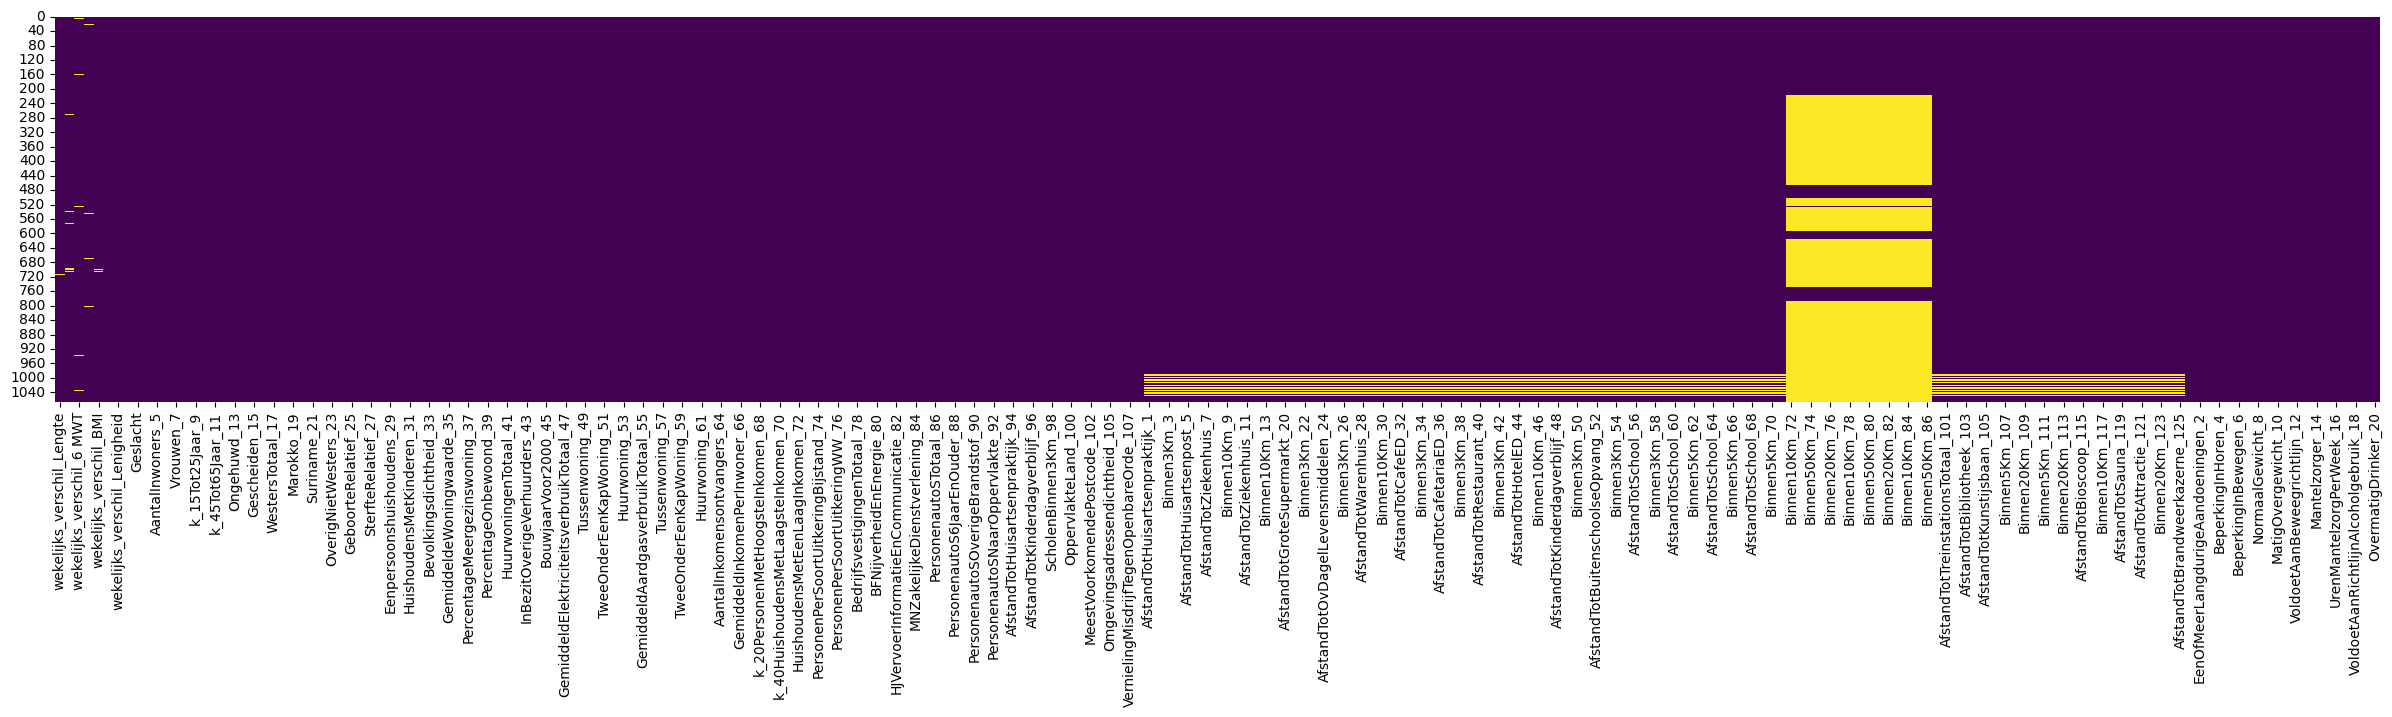

In [54]:
# View a plot with all NaN values Yellow
fig, ax = plt.subplots(figsize=(30, 5))
sns.heatmap(df_healthylife_cbs.isnull(),cbar=False,cmap='viridis')

In [53]:
# Get all columns with only NaN values
nan_columns = df_healthylife_cbs.columns[df_healthylife_cbs.isna().all()].tolist()
print(nan_columns)

# Remove all columns with only NaN values
df_healthylife_cbs.drop(columns=nan_columns, inplace=True)

[]
